<a href="https://colab.research.google.com/github/Varora-24/Eye-Detection-Using-M.L/blob/main/EyeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of eyes detected: 1
Saved eye patch 0 at position (90,45) as eye_patch_0_at_90_45.jpg
Saved visualization image as eye_patch_visualization.jpg


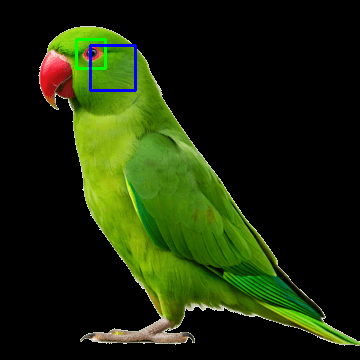

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Use this only in Google Colab

# Load the image
image_path = 'tota.png'  # Replace with your image path or filename
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(f"Unable to load image at {image_path}")

# Load Haar cascade for eye detection
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
if eye_cascade.empty():
    raise Exception("Failed to load haarcascade_eye.xml")

# Convert image to grayscale for detection
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect eyes
eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(20, 20))
print(f"Number of eyes detected: {len(eyes)}")

# Define 8x8 grid for 64 patches
num_patches_per_side = 8
patch_width = img.shape[1] // num_patches_per_side
patch_height = img.shape[0] // num_patches_per_side

# Divide image into 64 patches
patches = []
for i in range(num_patches_per_side):
    for j in range(num_patches_per_side):
        x = j * patch_width
        y = i * patch_height
        patch = img[y:y+patch_height, x:x+patch_width]
        patches.append(((x, y), patch))

# Find and extract patches containing eyes
eye_patches = []
for (ex, ey, ew, eh) in eyes:
    eye_center_x = ex + ew // 2
    eye_center_y = ey + eh // 2
    # Calculate which patch contains the eye center
    patch_col = eye_center_x // patch_width
    patch_row = eye_center_y // patch_height
    patch_x = patch_col * patch_width
    patch_y = patch_row * patch_height
    for (px, py), patch in patches:
        if px == patch_x and py == patch_y:
            eye_patches.append((px, py, patch))
            # Uncomment the following if only the first eye patch needed
            # break

# Save eye patches
for idx, (px, py, eye_patch) in enumerate(eye_patches):
    filename = f'eye_patch_{idx}_at_{px}_{py}.jpg'
    cv2.imwrite(filename, eye_patch)
    print(f"Saved eye patch {idx} at position ({px},{py}) as {filename}")

# Draw rectangles on original image for eyes and patches
for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(img, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
for (px, py, _) in eye_patches:
    cv2.rectangle(img, (px, py), (px+patch_width, py+patch_height), (255, 0, 0), 2)

# Save visualization image
vis_image_path = "eye_patch_visualization.jpg"
cv2.imwrite(vis_image_path, img)
print(f"Saved visualization image as {vis_image_path}")

# Show the visualization image in Google Colab
cv2_imshow(img)
# In Colab, no need for cv2.waitKey() or cv2.destroyAllWindows()
